   Id GRID_ID      lat      lon  id_1  cluster_la  tagged_lat  tagged_lon  \
0   0   AU-55  40.5623 -73.9113     3           0   40.562281  -73.911379   
1   0   AZ-55  40.5656 -73.8738     1           2   40.565813  -73.873166   
2   0   AJ-54  40.5722 -73.9937    68           0   40.572204  -73.993668   
3   0   AL-54  40.5722 -73.9787   135           0   40.573567  -73.978102   
4   0   AH-53  40.5788 -74.0087     7           0   40.578863  -74.008854   

   col_id  row_id   snap_lat   snap_lon  \
0      17      53  40.562281 -73.911379   
1      22      53  40.565813 -73.873166   
2       6      52  40.572204 -73.993668   
3       8      52  40.573567 -73.978102   
4       4      51  40.578863 -74.008854   

                                            geometry  
0  POLYGON ((-73.90630 40.56230, -73.90881 40.559...  
1  POLYGON ((-73.86885 40.56556, -73.87136 40.562...  
2  POLYGON ((-73.98868 40.57223, -73.99118 40.568...  
3  POLYGON ((-73.97370 40.57222, -73.97620 40.568...  
4  

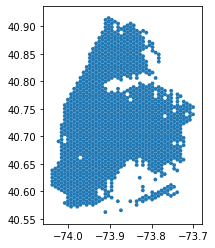

In [3]:
import numpy as np
import pickle
import geopandas as gpd
import pandas as pd
import numpy as np
with open('../data/hex_diffusion.pkl','rb') as f:
    hex_diffusions=pickle.load(f)
    
df = gpd.read_file('../data/NYC_shapefiles/snapped_clustered_hex.shp')  # tagged_cluster_hex

df.plot()
print(df.head())

row_col_coords = df[['row_id', 'col_id']].to_numpy()

In [2]:
mat = np.zeros((1347,54, 46))
for key_id, diffusions in hex_diffusions.items():
    for hex_id, diff in enumerate(diffusions):
            row_id, col_id = row_col_coords[hex_id]
            mat[key_id, row_id, col_id] = diff

In [4]:
import matplotlib.pyplot as plt

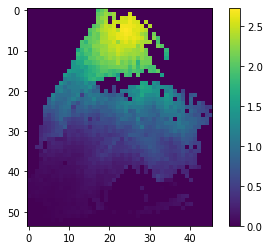

In [4]:
plt.imshow(mat[1300])
plt.colorbar()

In [2]:
def read_info(seed,option):
    file='logs/test_results/matching_od_{}_0.005_nc_{}.csv'.format(option,seed)
    file2='logs/test_results/cruising_od_{}_0.005_nc_{}.csv'.format(option,seed)
    od_gap='logs/test_results/demand_supply_gap_{}_0.005_nc_{}.csv'.format(option,seed)
    parsed_results='logs/test_results/parsed_results_{}_0.005_nc_{}.csv'.format(option,seed)
    match_cols=['vid','tick','from','to','dist','trip_time','action']
    relo_cols=['vid','tick','from','to','dist','trip_time','action']
    trip_df=pd.read_csv(file,names=match_cols, header=None,skiprows=1)
    relo_df=pd.read_csv(file2,names=match_cols, header=None,skiprows=1)
    gap_df=pd.read_csv(od_gap)
    parsed_results=pd.read_csv(parsed_results)
    return trip_df,relo_df,gap_df,parsed_results


def read_train_info(seed,option):
    file='logs/matching_od_{}_0.005_nc_{}.csv'.format(option,seed)
    file2='logs/cruising_od_{}_0.005_nc_{}.csv'.format(option,seed)
    od_gap='logs/demand_supply_gap_{}_0.005_nc_{}.csv'.format(option,seed)
    parsed_results='logs/test_results/parsed_results_{}_0.005_nc_{}.csv'.format(option,seed)
    match_cols=['vid','tick','from','to','dist','trip_time','action']
    relo_cols=['vid','tick','from','to','dist','trip_time','action']
    trip_df=pd.read_csv(file,names=match_cols, header=None,skiprows=1)
    relo_df=pd.read_csv(file2,names=match_cols, header=None,skiprows=1)
    gap_df=pd.read_csv(od_gap)
    parsed_results=pd.read_csv(parsed_results)
    return trip_df,relo_df,gap_df,parsed_results

def plot_hex(values,row_col_coords,ax):
    #values in the format hex_id, and values as a dataframe
    mat=np.zeros((54,46))
    for _,row in values.iterrows():
        hex_id,value=row
        row_id, col_id = row_col_coords[hex_id]
        mat[row_id, col_id] = value
    ax.imshow(mat,vmin=-10,vmax=10,cmap='RdBu')
    
    
def plot_hex_df(values,df,ax,v=5):
    #values in the format hex_id, and values as a dataframe
    for _,row in values.iterrows():
        hex_id,value=row
        df.loc[hex_id,'value']=value
    df.plot('value',vmin=-v,vmax=v,cmap='RdBu',ax=ax)
#     ax.set_yticklabels([])
#     ax.set_xticklabels([])
    return ax

    
def plot_hex_df_average(values_list,df,n_tick,ax,v=5):
    #values in the format hex_id, and values as a dataframe
    df['value']=0
    for values in values_list:
        for _,row in values.iterrows():
            hex_id,value=row
            df.loc[hex_id,'value']+=value
    df['value']/=n_tick
    df.plot('value',vmin=-v,vmax=v,cmap='RdBu',ax=ax)
#     ax.set_yticklabels([])
#     ax.set_xticklabels([])
    return ax

In [165]:
seed=11100
option=0
#matching od pairs
t_dqn,r_dqn,g_dqn=read_info(11100,0)
t_drdqn,r_drdqn,g_drdqn=read_info(18800,3)
t_odrdqn,r_odrdqn,g_odrdqn=read_info(18500,3)
print(trip_df.head())
print(relo_df.head())
print(gap_df.head())
# df.columns={'id','tick','from','to','dist','trip_time','action'}

     vid  tick  from    to   dist  trip_time  action
264  120   700   661     0    0.0          0       1
151  360   436   397     0    0.0          0       1
173  360   609   571  1262  135.8          0       6
217  240   634   629     0    0.0         60       1
433  180   705   664     0    0.0          0       1
   vid  tick  from   to  dist  trip_time  action
0  265   120   125  144     0          0       2
1  297   120   448  410     0          0       6
2  343   120   538  539     0          0       6
3  209   120   519  559     0          0       1
4  145   120   657  656     0          0       6
   step  hex_zone_id  demand_supply_gap
0   300            0                 -1
1   300            1                  0
2   300            2                  0
3   300            3                  0
4   300            4                  0


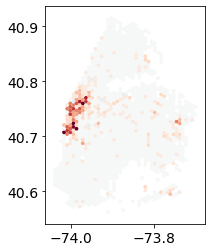

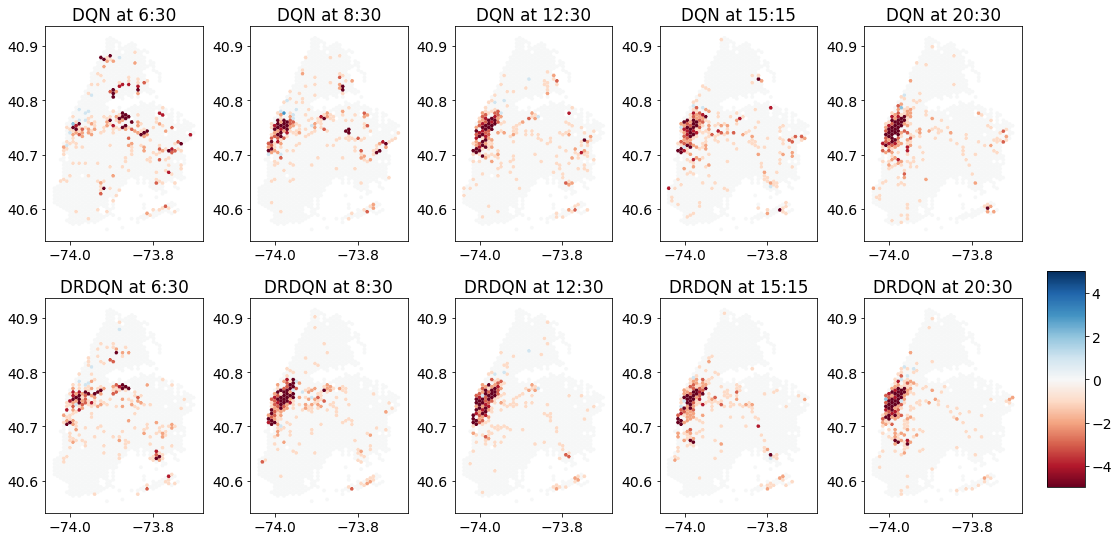

In [231]:
import matplotlib
matplotlib.rcParams.update({'font.size': 14})
t_list=[390,510,750,915,1230]
df = gpd.read_file('../data/NYC_shapefiles/snapped_clustered_hex.shp')  # tagged_cluster_hex
fig,ax=plt.subplots(2,len(t_list),figsize=(3.5*len(t_list),10))

seed=11100
option=0
#matching od pairs
t_dqn,r_dqn,g_dqn=read_info(11100,0)
t_drdqn,r_drdqn,g_drdqn=read_info(18800,3)
t_odrdqn,r_odrdqn,g_odrdqn=read_info(18500,3)

for idx,t in enumerate(t_list):
    gap_dqn=g_dqn[g_dqn['step']==t*60][['hex_zone_id','demand_supply_gap']]
    gap_drdqn=g_drdqn[g_drdqn['step']==t*60][['hex_zone_id','demand_supply_gap']]
    gap_odrdqn=g_odrdqn[g_odrdqn['step']==t*60][['hex_zone_id','demand_supply_gap']]
#     print(gap_dqn,gap_odrdqn)
    v=5
    ax[0,idx]=plot_hex_df(gap_dqn,df,ax[0,idx],v=v)
    ax[1,idx]=plot_hex_df(gap_drdqn,df,ax[1,idx],v=v)
    ax[0,idx].set_title('DQN at {}:{}'.format(t//60,t%60))
    ax[1,idx].set_title('DRDQN at {}:{}'.format(t//60,t%60))
    
cax = fig.add_axes([0.92, 0.2, 0.03, 0.3])
sm = plt.cm.ScalarMappable(cmap='RdBu', norm=plt.Normalize(vmin=-v, vmax=v))
sm._A = []
fig.colorbar(sm, cax=cax)
plt.subplots_adjust(wspace=0.3,hspace=0.0)
# plt.subplot_tool()
plt.tight_layout()
plt.savefig('results/demand_supply_gap.pdf')

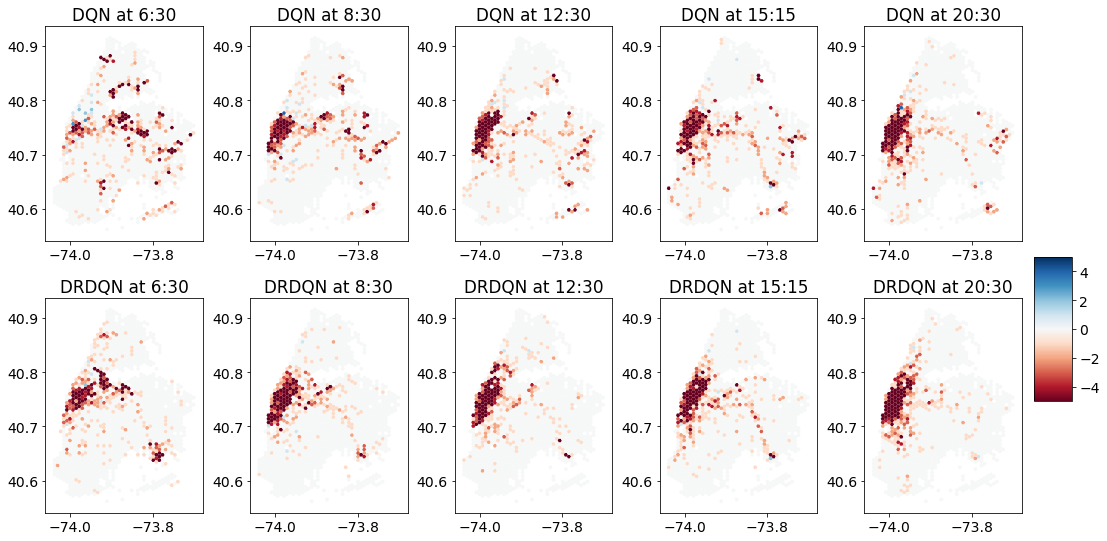

In [320]:
import matplotlib
matplotlib.rcParams.update({'font.size': 14})
t_list=[390,510,750,915,1230]
df = gpd.read_file('../data/NYC_shapefiles/snapped_clustered_hex.shp')  # tagged_cluster_hex
fig,ax=plt.subplots(2,len(t_list),figsize=(3.5*len(t_list),10))

seed=11100
option=0
#plot range of OD
t_dqn,r_dqn,g_dqn,_=read_info(11100,0)
t_drdqn,r_drdqn,g_drdqn,_=read_info(19600,3)
# t_odrdqn,r_odrdqn,g_odrdqn,_=read_info(18800,3)

for idx,t in enumerate(t_list):
    gap_dqn=[]; gap_drdqn=[]; 
    for t_ in range(10):
        gap_dqn.append(g_dqn[g_dqn['step']==(t+t_)*60][['hex_zone_id','demand_supply_gap']])
        gap_drdqn.append(g_drdqn[g_drdqn['step']==(t+t_)*60][['hex_zone_id','demand_supply_gap']])

    v=5
    ax[0,idx]=plot_hex_df_average(gap_dqn,df,1,ax[0,idx],v=v)
    ax[1,idx]=plot_hex_df_average(gap_drdqn,df,1,ax[1,idx],v=v)
    ax[0,idx].set_title('DQN at {}:{}'.format(t//60,t%60))
    ax[1,idx].set_title('DRDQN at {}:{}'.format(t//60,t%60))

cax = fig.add_axes([0.91, 0.32, 0.03, 0.2])
sm = plt.cm.ScalarMappable(cmap='RdBu', norm=plt.Normalize(vmin=-v, vmax=v))
sm._A = []
fig.colorbar(sm, cax=cax)
plt.subplots_adjust(wspace=0.3,hspace=0.0)
# plt.subplot_tool()
plt.savefig('results/demand_supply_gap_average.pdf')

# lets play with driver level information


In [63]:
def track_trajectory(df,h_id):
    end=1
    trajec=[]
    act=[]
    if  sum(df['from']==h_id)==0: #not even relocate from here
        return trajec,act
    
    for _,row in df.iterrows():
        _,tick,from_,to_,_,_,action=row
        if end==1 and from_==h_id: #first encounter
            end=0
            trajec.append(to_)
            act.append(action)
            last_to=to_
        elif end==0 and from_==last_to:#continued relocation from last location
            trajec.append(to_)
            act.append(action)
            last_to=to_
        elif end==0 and from_!=last_to:
            end=1
            trajec.append(-1)
            act.append(-1)
#             if end==0:
#                 trajec.append(-1)
#                 act.append(-1)
    return trajec,act



def shade_plot(q,s,ax,name,color,a=1,alpha=0.25):
    y=np.mean(q,axis=0)
    std=np.std(q,axis=0)
    y1=y+a*std
    y2=y-a*std
    ax.plot(s,y,'-.',color=color,label=name,lw=1)
    ax.fill_between(s,y1,y2,color=color,alpha=alpha)
    
def time_of_day_serving():
    1


In [ ]:
t_dqn,r_dqn,g_dqn,parsed_=read_train_info(19600,3)
t_dqn_v,r_dqn_v,g_dqn_V,parsed_v=read_info(19600,3)
d_df=r_dqn.groupby('vid')
for d in d_df.groups:
    driver_df=d_df.get_group(d)
    tj,act=track_trajectory(driver_df,100)
    if len(tj)>0:
        print(tj,act)

# waiting time distribution

5.0


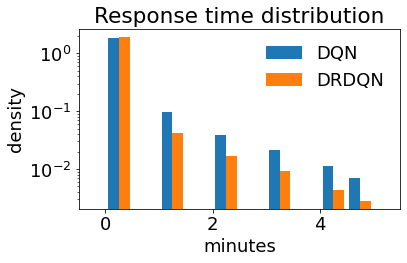

In [61]:
#measure waiting time 
import matplotlib
import seaborn as sns
t_dqn,r_dqn,g_dqn,parsed_=read_info(11100,0)
t_drdqn,r_dqn,g_dqn,parsed_dr=read_info(19600,3)

wait_time_dqn=np.ceil(t_dqn['trip_time'].to_numpy()/60)
wait_time_drdqn=np.ceil(t_drdqn['trip_time'].to_numpy()/60)
print(wait_time_dqn.max())

colors = ['#E69F00', '#56B4E9', '#F0E442']
matplotlib.rcParams.update({'font.size': 18})
names = ['DQN','DRDQN']

fig,ax=plt.subplots(figsize=(6,4))
plt.hist([wait_time_dqn,wait_time_drdqn] ,density=True, label=names,align='mid')
ax.legend(frameon=False)
ax.set_title('Response time distribution')
ax.set_xlabel('minutes')
ax.set_yscale('log')
ax.set_xlim([-0.5,5.5])
ax.set_ylabel('density')
plt.tight_layout()
plt.savefig('response_time.pdf')

   time  num_idle  num_serving  num_charging  num_cruising  num_assigned  \
0     0         0            0             0             0             0   
1    60        21            0             0             0             0   
2   120        15            0             0            15             6   
3   180        13            0             0            20            14   
4   240        26            1             0            22            17   

   num_waitpile  num_tobedisptached  average_idle_time  num_matches  \
0             0                   0                NaN            0   
1             0                   0           0.000000            0   
2             0                   0          -0.082941            6   
3             0                   0          -0.165207            8   
4             0                   0          -0.204545            4   

   average_idle_dist  longwait_pass  served_pass  removed_pass  \
0                NaN              0            0  

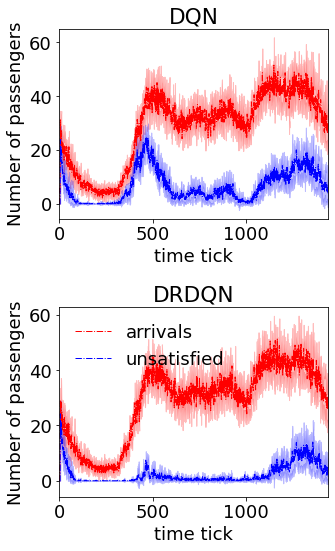

In [68]:
#measure average occupancy rate
t_dqn,r_dqn,g_dqn,parsed_=read_train_info(11100,0)
t_dqn_v,r_dqn_v,g_dqn_V,parsed_v=read_info(11100,0)
t_dqn,r_dqn,g_dqn,parsed_dr=read_train_info(19600,3)
t_dqn_v,r_dqn_v,g_dqn_V,parsed_v_dr=read_info(19600,3)
print(parsed_v.head())
hits=[]
miss=[]
for t in range(0,parsed_v.shape[0],1440):
    if t==4*1440:
        continue
    hits.append(parsed_v.loc[t:t+1439,'removed_pass'].to_numpy())
    miss.append(parsed_v.loc[t:t+1439,'longwait_pass'].to_numpy())

print(hits[0].shape)

fig,ax=plt.subplots(2,1,figsize=(5,8))
shade_plot(hits,np.arange(1440),ax[0],name='arrivals',color='r')
shade_plot(miss,np.arange(1440),ax[0],name='unsatisfied',color='b')
ax[0].set_xlabel('time tick')
ax[0].set_xlim([0,1439])
ax[0].set_ylabel('Number of passengers')
ax[0].set_title('DQN')


hits=[]
miss=[]
for t in range(0,parsed_v.shape[0],1440):
    if t==4*1440:
        continue
    hits.append(parsed_v_dr.loc[t:t+1439,'removed_pass'].to_numpy())
    miss.append(parsed_v_dr.loc[t:t+1439,'longwait_pass'].to_numpy())

print(hits[0].shape)

shade_plot(hits,np.arange(1440),ax[1],name='arrivals',color='r')
shade_plot(miss,np.arange(1440),ax[1],name='unsatisfied',color='b')
ax[1].set_xlabel('time tick')
ax[1].set_xlim([0,1439])
ax[1].set_ylabel('Number of passengers')
ax[1].set_title('DRDQN')
ax[1].legend(frameon=False)

plt.tight_layout()
plt.savefig('dqn_serve_leave.pdf')